<div>
<img src="attachment:image.png" width="200">
</div>

# Exploratory Activity 7: Analytical Chemistry II

*Adapted from Chem 182*

<div>
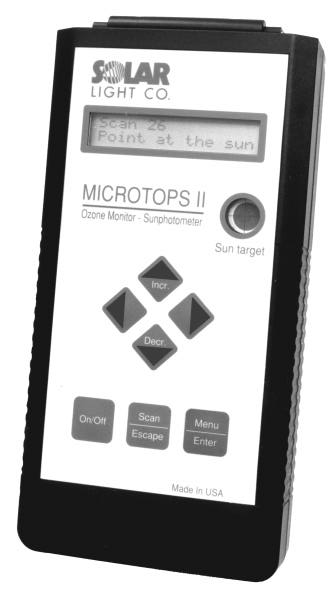
</div>

The above instrument is the MICROTOPS II Ozone Monitor and Sunphotometer. In this exercise, the amount of ozone in an air column between the ground and the top of the atmosphere will be measured using the  ozone spectrophotometer and then analyzed.

Recall from yesterday that a spectrometer consisting of a light source, a monochromator, and a light detector was used to measure the amount of radiation absorbed at particular wavelengths by simulated food dye samples. A slightly altered version of the Beer law equation that was used yesterday will be used today. It is known as the Beer-Lambert law:

$\frac{I_0}{I} = \exp{(\alpha [C] l)}$

$\alpha$: molar absorption coefficient

$[C]$:  the concentration of the absorbing species

$l$: thickness of sample

$I_0$: intensity of light before passing through sample 

$I$: intensity of light after passing through sample

Using similar principles, in this lab you will measure the amount of light at several different
wavelengths absorbed by ozone in the atmosphere as it undergoes an electronic transition. In this
case, the light source is the sun, the sample "vial" is the entire atmosphere, and the light detectors
and light filters are contained in a compact hand-held instrument that measures the amount of
radiation absorbed by ozone at several different wavelengths. Because we are working in “the real
world”, applying the Beer-Lambert Law is not quite as straight-forward as in a controlled laboratory
setting. In this case, the amount of light from the sun entering at the top of the atmosphere ($I_0$) is not
directly known. Furthermore, some amount of the incoming radiation, $I_0$, is not absorbed by ozone
but is "scattered" by aerosol particles (Mie scattering) and air molecules (Rayleigh scattering) and
therefore does not make it to the detectors. To address these problems, the radiation at multiple
wavelengths that are absorbed by ozone and wavelengths that are NOT absorbed by ozone (but that
are scattered) are measured. Using the measured ratios of light intensities at several different
wavelengths, the amount of ozone in the atmosphere between the instrument and the sun can be
calculated.

Look through the following websites, manuals, and journal papers as background reading.
* Stratospheric ozone measurements in "Stratospheric Ozone: An Electronic Textbook":
http://www.ccpo.odu.edu/SEES/ozone/class/Chap_7/index.htm
* Dobson units: http://ozonewatch.gsfc.nasa.gov/facts/dobson.html
http://www.theozonehole.com/dobsonunit.htm
* MICROTOPS II manual (especially pp 5-9, 39-50, 54) 
* M. Morys et al., Journal of Geophysical Research, Vol 106, D13, 14573-14582, 2001

In this experiment, you will use measurements that have been taken using the MICROTOPS II spectrophotometer. It is a hand-held multiband sunphotometer and it has five different wavelength channels (305.5, 312.5, 320, 940 and
1020nm) for measuring total column ozone, total column water vapor, and aerosol optical thickness.
In this experiment, we will focus primarily on the total column ozone measurements.

In [ ]:
import pandas as pd

microtops_data = pd.read_csv("data/microtops_measurements_2020.csv", error_bad_lines=False) 

#view the first 5 lines
microtops_data[0:5]

You will use the ratios of individual pairs of wavelengths as on page 45 of the manual and the combination of three wavelengths as on page 54 to calculate the total column ozone for the time series above.

Calibration of the MICROTOPS II instrument requires that the intensity of radiation measured at each channel be analyzed assuming the validity of the Beer-Lambert law, which when applied to ozone absorption and Rayleigh scattering by the atmosphere, gives the simple equation

$I = I_0 \exp{(-\alpha \mu [C]-m\beta P/P_0)}$

$\alpha$ is the ozone absorption coefficient at that specific wavelength

$\mu$ the ratio of the actual and vertical path lengths of the radiation through the ozone layer

$P$ is the pressure of the atmosphere in mB 

$P_0$ is standard pressure = 1013.25 mB

$m$ is a quantity known as the airmass, which is defined as the ratio of the actual and vertical path lengths of the radiation through the entire
atmosphere to the detector.

$\beta$ represents the Rayleigh scattering coefficient by the atmosphere, and particulate scattering produced by haze (water plus atmospheric pollutants of micron particle size).


**Question 1.1** Calculate secZ, m, h, ν, μ for the first microtops_data measurement using the equations from the manual (p. 44-45). Note that the recorded altitude is in meters. 

In [ ]:
import math

## Code for sec Z (the secant of SZA)

secZ = 1/math.cos(microtops_data['SZA'][0])
print(secZ)

##Code for m 

m = secZ - 0.0018167*(secZ -1)-0.002875*(secZ-1)**2-0.0008083*(secZ -1)**3
print(m)

## code for u
h = 26 -0.1 * microtops_data['LATITUDE'][0]
print(h)
v = (6371 + microtops_data['ALTITUDE'][0]/1000)**2/(6371+ h)**2
print(v)
u = 1/(1 - v * math.sin(microtops_data['SZA'][0])**2)**(1/2)
u


**Question 1.2** Calculate values for the total column ozone (O$_3$305.5-312.5, O$_3$312.5-320) for the first microtops measurement based on the ratios of individual pairs of wavelengths using the equation on pg 45 of the manual and the wavelength pairs noted above. The instrument calibration parameters are:

$L_{12}$ = 0.7206;
$L_{23}$ = 0.8826;
$\alpha_{12}$ = 2.945;
$\alpha_{23}$ = 1.097;
$\beta_{12}$ = 0.1024;
$\beta_{23}$ = 0.0933;

The signals at the three ozone wavelengths are in the columns 'SIG305', 'SIG312', and 'SIG320'

In [ ]:
R_305_312 = math.log(microtops_data['SIG305'][0]/microtops_data['SIG312'][0])

O3_305_312 = 1000*(0.7206 - R_305_312 - 0.1024*m*microtops_data['PRESSURE'][0] /1013.25)/(2.945*u)
print(O3_305_312)

R_312_320 = math.log(microtops_data['SIG312'][0]/microtops_data['SIG320'][0])

O3_312_320 = 1000*(0.8826 - R_312_320 - 0.0933*m*microtops_data['PRESSURE'][0] /1013.25)/(1.097*u)
print(O3_312_320)


**Question 1.3** Also calculate values for the total column ozone using two pairs of wavelengths simultaneously (305.5/312.5 and 312.5/320nm), the instrument calibration parameters, and the equation on p. 54 of the manual. (Note that the right side of the equation on p. 54 needs to be multiplied by 1000 for the units to work out.)


In [ ]:
## CODE FOR OZONE COLUMNS WITH ALL THREE WAVELENGTHS
O3_all = 1000 * (  (0.7206 - R_305_312) - (0.8826 - R_312_320) - (0.1024 -  0.0933) *m*microtops_data['PRESSURE'][0] /1013.25)/((2.945-1.097)*u )
O3_all

**Question 1.4** Now calculate the total column ozone for  all times in microtop_data using the equation from Question 1.3. Create a column in the data frame with these column ozone values. 

In [ ]:
microtops_data['ozone']=None

## CALCULATE OZONE COLUMNS AT ALL TIMES
for i, row in microtops_data.iterrows():
    
    secZ = 1/math.cos(microtops_data['SZA'][i])
    m = secZ - 0.0018167*(secZ -1)-0.002875*(secZ-1)**2-0.0008083*(secZ -1)**3
    h = 26 -0.1 * microtops_data['LATITUDE'][i]
    v = (6371 + microtops_data['ALTITUDE'][i]/1000)**2/(6371+ h)**2
    u = 1/(1 - v * math.sin(microtops_data['SZA'][i])**2)**(1/2)
    R_305_312 = math.log(microtops_data['SIG305'][i]/microtops_data['SIG312'][i])
    R_312_320 = math.log(microtops_data['SIG312'][i]/microtops_data['SIG320'][i])
    O3_all = 1000 * (  (0.7206 - R_305_312) - (0.8826 - R_312_320) - (0.1024 -  0.0933) *m*microtops_data['PRESSURE'][i] /1013.25)/((2.945-1.097)*u )
    
    microtops_data.at[i, "ozone"]= O3_all

**Question 1.5** Plot a time series for your ozone data. *Hint: it may be helpful to consult activity 3.*

In [ ]:
import datetime
import matplotlib.pyplot as plt

microtops_data['datetime']=None

print(microtops_data['DATE'][0]+ ' '+microtops_data['TIME'][0])

# calculate the new 'datetime' column by taking the 'start_hour' column
# and adding it to the 'date' column
for i, row in microtops_data.iterrows():
    time = microtops_data['TIME'][i]
    microtops_data.at[i, "datetime"]=datetime.datetime.strptime(str(row['DATE'])+ ' '+ str(row['TIME']), '%m/%d/%Y %H:%M:%S')
    
# set the new datetime columns to be the index of each dataframe
microtops_data.set_index('datetime', inplace=True, drop=True)

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

# add plots to the axis using the timestamp variables as the 'x' and NO2 values for the 'y'
ax.plot(microtops_data.index,microtops_data['ozone'],linewidth=.5,label='ozone column')

**Question 1.6** Get rid of any outliers and replot the data.

In [ ]:
import numpy as np

##STUDENTS CHOICE FOR OUTLIER REMOVAL
for value in microtops_data['ozone']:
    if  ( (value>5000) | (value<0)):
        microtops_data =microtops_data.replace({'ozone':{value:np.NaN}})

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

# add plots to the axis using the timestamp variables as the 'x' and NO2 values for the 'y'
ax.plot(microtops_data.index,microtops_data['ozone'],linewidth=.5,label='ozone column')

**Question 1.7** Plot a time series for your ozone data as measured yearly mean columns

In [ ]:
##GROUP AND AVERAGE BY YEAR

microtops_data_grouped = microtops_data.groupby(pd.Grouper(freq='Y')).aggregate(np.nanmean)
##PLOT YEARLY AVERAGED DATA 

fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

# add plots to the axis using the timestamp variables as the 'x' and NO2 values for the 'y'
ax.plot(microtops_data_grouped.index,microtops_data_grouped['ozone'],linewidth=.5,label='ozone column')

**Question 1.8** Separate the data by spring (Feb - May) and fall (Aug - Nov). Find the averages for each season.

In [ ]:
ozone_data_spring= microtops_data[(microtops_data.index.month >= 2) & (microtops_data.index.month <= 5)]
ozone_data_fall= microtops_data[(microtops_data.index.month >= 8) & (microtops_data.index.month <= 11)]

print(ozone_data_spring['ozone'].aggregate(np.nanmean))
ozone_data_fall['ozone'].aggregate(np.nanmean)

**Question 2** Go NASA [Worldview](https://worldview.earthdata.nasa.gov/). You will use this website later in the course. For now we will look at the ozone columns from a satellite. Follow the procedures below:
1. Click the Eye symbol next to "Corrected Reflectance" to turn off this view.  
2. Click "Add Layers" and "Air Quality"
3. Select "Ozone" and check the box under "Suomi NPP/OMPS". Close the box. 
4. Move the "Coastlines" overlay so it is above the "Ozone" overlay. This will allow you to see the coastline while looking at ozone data. 
5. In the Bottom left corner hover over the up arrow and change the timescale to "MONTH"
6. Scroll to a year that you have ozone data for from the microtops instrument. 
7. Hover your cursor over California. In the lower left you should see longitude and latitude coordinates. Find approximately 37.873,-122.259 (the coordinates for Berkeley)
8. Note the ozone column value. 
9. Repeat this for 1-2 additional dates in your ozone record.

**Question 2.1** How does the ozone column measured by the microtops instrument compare with the satelite measurement? How do they compare qualitatively and quantitatively over the different seasons? Which instrument do you think is more accurate? Why? Is the ozone column larger in the spring or fall? 